In [1]:
import torch
from model.kmeansc import *
import time
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score

def map_arrangement(arr):
    # Initialize the result array with None
    result = [None] * len(arr)

    # Variable to track the next number to assign
    num = 1  # Starting from 1

    # First pass to assign unique numbers
    for i, number in enumerate(arr):
        if result[i] is None:
            result[i] = num  # Assign the current number
            for j in range(i + 1, len(arr)):  # Start from the next index
                if arr[j] == number and result[j] is None:
                    result[j] = num  # Assign the same number to duplicates
            num += 1  # Increment for the next unique number

    return result

address = './data/SE(PeMS)_52.txt'

def check_type(obj):
    if isinstance(obj, np.ndarray):
        print("This is a NumPy array.")
    elif isinstance(obj, list):
        print("This is a Python list.")
    elif isinstance(obj, torch.Tensor):
        print("This is a PyTorch tensor.")
    else:
        print("This is an unknown type.")

In [2]:
with open(address, mode='r') as f:
    lines = f.readlines()
    temp = lines[0].split(' ')
    num_vertex, dims = int(temp[0]), int(temp[1])
    SE = torch.zeros((num_vertex, dims), dtype=torch.float32)
    for line in lines[1:]:
        temp = line.split(' ')
        index = int(temp[0])
        SE[index] = torch.tensor([float(ch) for ch in temp[1:]])

labels = equal_size_kmeans(SE, 65)
check_type(labels)
print(labels)
print(labels.dtype)

This is a NumPy array.
[54 54 23 49 23 18 23 13 37 28 34 44 13 11 28  4 34 59 51 23 23 55  8 28
 24 51 42 48 49 45 28 42  0  4  4 45 51 16 25 54 51 25 49 37 41 15 34 13
 31 59 34 47 18 25 51 28 24 43 57 49 31 47  4 60 29 49 18 55 22 55 57 45
 22 60 13  8 47 54 16 59  0  4 42 13 29  0 60 36 37 54 43  9 56 15 45  9
 55 22 55 57 64 60 22 47 18 43  9 43  7 29 56 43 58 44  0 25 36 41 42  8
 59 42 47  7 41 16 24 58 22 45 53 35 41 59 21 63 16 24 27 35 35 17 53 30
  3 17  0 31 17 57 53 21 35 11 11  7 41 40 11  7 21  8  8  5 21 53 53 17
 52 17 35 34 57  2 24 27 40 26 32 31  5 52 14 40 37 37 21 40 40 39 29 29
 26 16 58  2 14 26 26 20 20 20 11 20  6 19  6  6 19  6 19 39 39 26 39 20
 39 25 38 27 38 27 38 30 38 30 19 19  3 14 52 14 12 12 12 12 12 18 30 48
  3 33  5 10 10 33 38 36 36 30 63 15 44 36 15  7  5 52 58 58 56 61 61 61
 62 61 61 64 62 64 64 64 63 63 63 62 52 50 62 62 50 60 50 50 50 46 48 46
 48 48 33 33 33 56 56 32 32 32 32  5  2  3  2  1  1  1  2  1  1  3 46 31
 15 14 10 10 10  9  9  6 27 

In [3]:
start_time = time.time()

for run in range(5):
    all_labels = []
    for i in range(10):
        labels = equal_size_kmeans(SE, 65, 2)
        new_labels = map_arrangement(labels)
        all_labels.append(new_labels)

    total_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
    total_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
                
    avg_nmi = total_nmi/90
    avg_ari = total_ari/90
    print("Run ", run+1, ": ", avg_nmi, avg_ari)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")

Run  1 :  0.7796412673764281 0.3175576923076923
Run  2 :  0.7808632255199248 0.32403076923076907
Run  3 :  0.7844094120146956 0.3297769230769231
Run  4 :  0.790930306283711 0.34961153846153836
Run  5 :  0.7901206432077598 0.34826153846153857
Elapsed time: 4.564907 seconds


In [5]:
start_time = time.time()

for run in range(5):
    all_labels = []
    for i in range(10):
        labels = equal_size_kmeans(SE, 65, 10)
        new_labels = map_arrangement(labels)
        all_labels.append(new_labels)

    total_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
    total_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
                
    avg_nmi = total_nmi/90
    avg_ari = total_ari/90
    print("Run ", run+1, ": ", avg_nmi, avg_ari)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")

Run  1 :  0.8297153903850989 0.4580961538461539
Run  2 :  0.826356203049068 0.44715769230769226
Run  3 :  0.8376606237668374 0.47907307692307655
Run  4 :  0.8284877077265549 0.4558461538461538
Run  5 :  0.826646651757704 0.4528692307692308
Elapsed time: 14.694195 seconds


In [6]:
start_time = time.time()

for run in range(1):
    all_labels = []
    for i in range(10):
        labels = equal_size_kmeans(SE, 65, 50)
        new_labels = map_arrangement(labels)
        all_labels.append(new_labels)

    total_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
    total_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
                
    avg_nmi = total_nmi/90
    avg_ari = total_ari/90
    print("Run ", run+1, ": ", avg_nmi, avg_ari)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")

Run  1 :  0.8287033281005797 0.4578538461538463
Elapsed time: 19.297087 seconds


Iter count 5: NMI = 0.8201758007086607, ARI = 0.43119999999999997, Time = 2.641026 seconds
Iter count 10: NMI = 0.8285915982488595, ARI = 0.45740384615384616, Time = 4.005847 seconds
Iter count 15: NMI = 0.8320982378901348, ARI = 0.4643961538461538, Time = 5.933093 seconds
Iter count 20: NMI = 0.8363542077114591, ARI = 0.4793846153846155, Time = 8.977402 seconds
Iter count 25: NMI = 0.8323652660420356, ARI = 0.468376923076923, Time = 8.714930 seconds
Iter count 30: NMI = 0.8337515472570904, ARI = 0.4699692307692304, Time = 9.030202 seconds


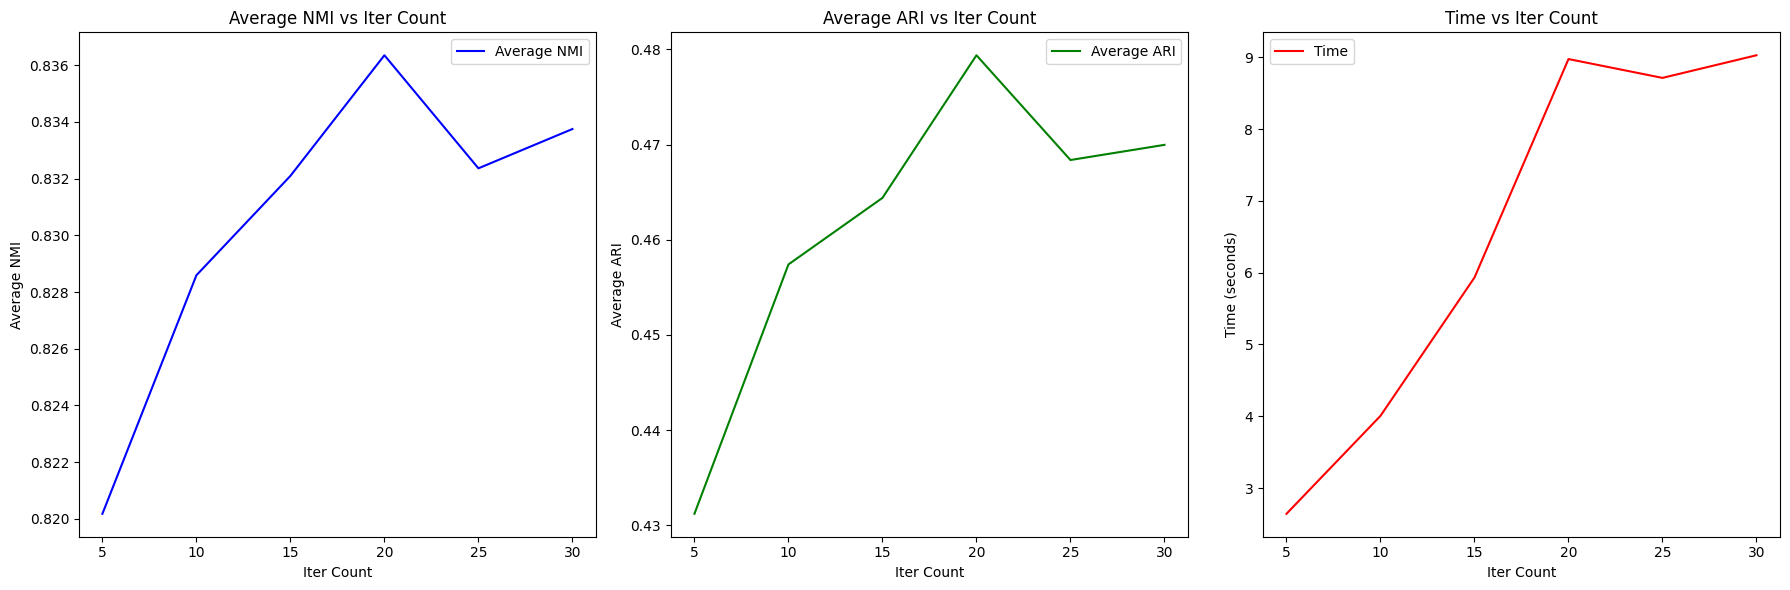

In [8]:
import matplotlib.pyplot as plt

iter_counts = list(range(5, 35, 5))
avg_nmi_values = []
avg_ari_values = []
iter_times = []

for iter_count in iter_counts:
    iter_start_time = time.time()
    
    all_labels = []
    for i in range(10):
        labels = equal_size_kmeans(SE, 65, iter_count)
        new_labels = map_arrangement(labels)
        all_labels.append(new_labels)

    total_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
    total_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
                
    avg_nmi = total_nmi / 90
    avg_ari = total_ari / 90
    avg_nmi_values.append(avg_nmi)
    avg_ari_values.append(avg_ari)
    
    iter_end_time = time.time()
    iter_elapsed_time = iter_end_time - iter_start_time
    iter_times.append(iter_elapsed_time)
    print(f"Iter count {iter_count}: NMI = {avg_nmi}, ARI = {avg_ari}, Time = {iter_elapsed_time:.6f} seconds")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(iter_counts, avg_nmi_values, label='Average NMI', color='blue')
plt.xlabel('Iter Count')
plt.ylabel('Average NMI')
plt.title('Average NMI vs Iter Count')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(iter_counts, avg_ari_values, label='Average ARI', color='green')
plt.xlabel('Iter Count')
plt.ylabel('Average ARI')
plt.title('Average ARI vs Iter Count')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(iter_counts, iter_times, label='Time', color='red')
plt.xlabel('Iter Count')
plt.ylabel('Time (seconds)')
plt.title('Time vs Iter Count')
plt.legend()

plt.tight_layout()
plt.show()

Iter count 1: NMI = 0.679151048583851, ARI = 0.09883400809716607, Time = 1.669122 seconds
Iter count 2: NMI = 0.7968124681945623, ARI = 0.3621495951417007, Time = 2.286855 seconds
Iter count 3: NMI = 0.7931957274367711, ARI = 0.3534757085020241, Time = 2.645876 seconds
Iter count 4: NMI = 0.7991879676036945, ARI = 0.3724303643724698, Time = 3.968301 seconds
Iter count 5: NMI = 0.809133103764326, ARI = 0.3999195344129554, Time = 3.432159 seconds
Iter count 6: NMI = 0.8125136740291821, ARI = 0.4106840080971656, Time = 4.441335 seconds
Iter count 7: NMI = 0.8234365084052486, ARI = 0.44261670040485795, Time = 4.867249 seconds
Iter count 8: NMI = 0.8204529239257095, ARI = 0.43197520242914983, Time = 5.537787 seconds
Iter count 9: NMI = 0.8302518479066865, ARI = 0.4614073886639677, Time = 6.060433 seconds
Iter count 10: NMI = 0.8344789605648518, ARI = 0.47106508097165994, Time = 6.585577 seconds


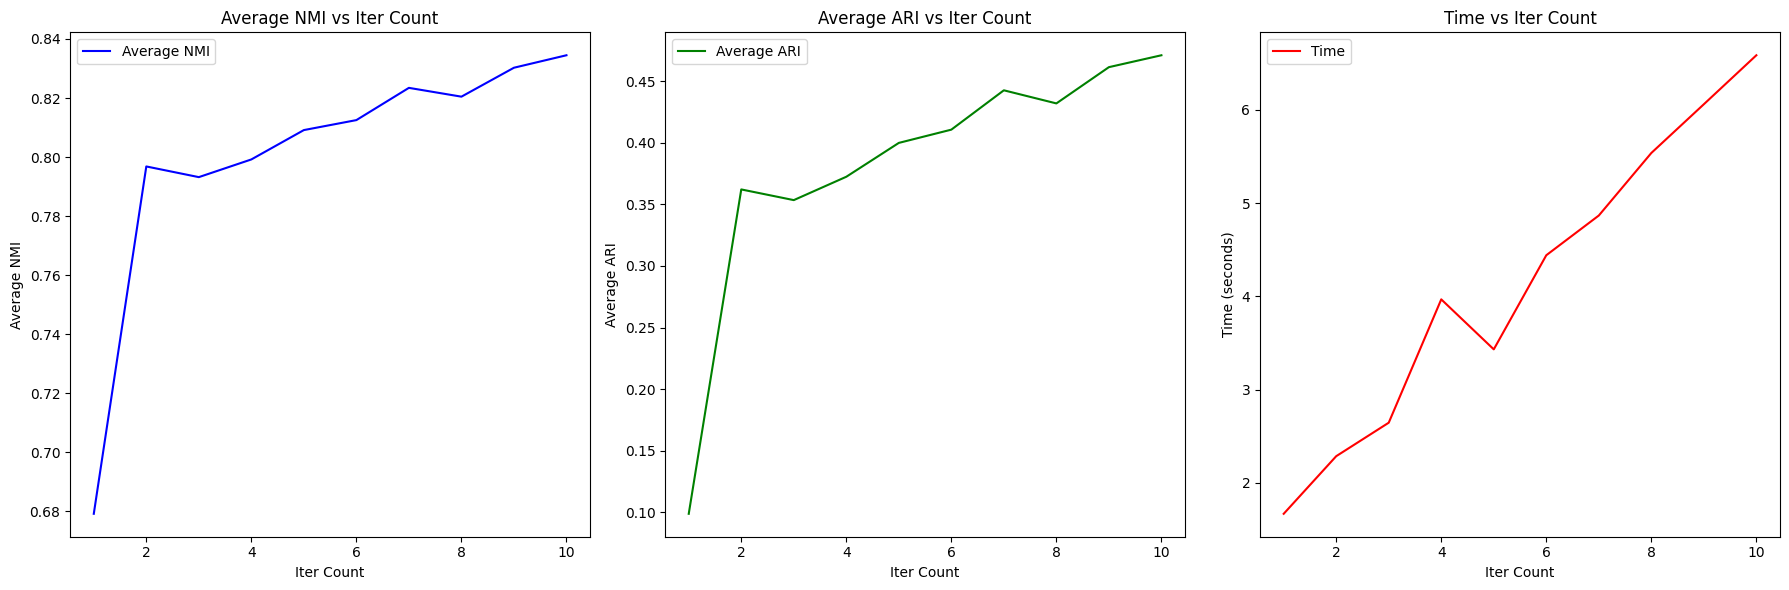

In [10]:
import matplotlib.pyplot as plt

runs = 20
iter_counts = list(range(1, 11))
avg_nmi_values = []
avg_ari_values = []
iter_times = []

for iter_count in iter_counts:
    iter_start_time = time.time()
    
    all_labels = []
    for i in range(runs):
        labels = equal_size_kmeans(SE, 65, iter_count)
        new_labels = map_arrangement(labels)
        all_labels.append(new_labels)

    total_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(runs) for j in range(runs) if i != j)
    total_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(runs) for j in range(runs) if i != j)
                
    avg_nmi = total_nmi / (runs * (runs - 1))
    avg_ari = total_ari / (runs * (runs - 1))
    avg_nmi_values.append(avg_nmi)
    avg_ari_values.append(avg_ari)
    
    iter_end_time = time.time()
    iter_elapsed_time = iter_end_time - iter_start_time
    iter_times.append(iter_elapsed_time)
    print(f"Iter count {iter_count}: NMI = {avg_nmi}, ARI = {avg_ari}, Time = {iter_elapsed_time:.6f} seconds")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(iter_counts, avg_nmi_values, label='Average NMI', color='blue')
plt.xlabel('Iter Count')
plt.ylabel('Average NMI')
plt.title('Average NMI vs Iter Count')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(iter_counts, avg_ari_values, label='Average ARI', color='green')
plt.xlabel('Iter Count')
plt.ylabel('Average ARI')
plt.title('Average ARI vs Iter Count')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(iter_counts, iter_times, label='Time', color='red')
plt.xlabel('Iter Count')
plt.ylabel('Time (seconds)')
plt.title('Time vs Iter Count')
plt.legend()

plt.tight_layout()
plt.show()